In [48]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
mat=loadmat("ex5data1.mat")

# mat is a dict with key "X" for x-values, and key "y" for y values
X=mat["X"]
y=mat["y"]
Xtest=mat["Xtest"]
ytest=mat["ytest"]
Xval=mat["Xval"]
yval=mat["yval"]

Text(0, 0.5, 'Water flowing out of the dam')

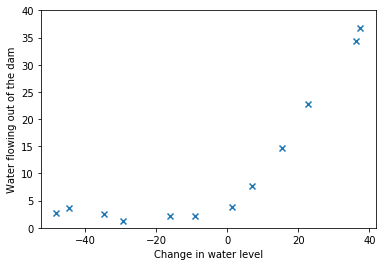

In [50]:
plt.scatter(X, y, marker="x")
plt.xlabel("Change in water level")
plt.ylim(0,40)
plt.ylabel("Water flowing out of the dam")

In [51]:
m = len(X)
ones = np.ones((m, 1))
X_1 = np.hstack((ones, X))
(m, n) = X_1.shape
theta = np.ones((n, 1))

# Set regularization parameter lambda
Lambda = .08

## Compute the Regularized Linear Regression Cost Function


In [86]:
def linearRegCostFunction(X, y,theta, Lambda):
    """
    computes the cost of using theta as the parameter for linear regression to fit the data points in X and y. 
    
    Returns the cost and the gradient
    """    
    m = len(y)
    
    predictions = X @ theta
    cost = 1/(2*m) * np.sum((predictions - y) ** 2)
    reg_cost = cost + Lambda/(2*m) * (np.sum(theta[1:] ** 2))
    
    # compute the gradient
    
    grad1 = 1/m * X.T @ (predictions - y)
    grad2 = 1/m * X.T @ (predictions - y) + (Lambda/m * theta)
    grad = np.vstack((grad1[0],grad2[1:]))
    
    return reg_cost, grad

cost, grad = linearRegCostFunction(X_1, y, theta, Lambda)
print("Cost at theta = [1 ; 1]:",cost)
print("Gradient at theta = [1 ; 1]:\n",grad)

Cost at theta = [1 ; 1]: 22.409786735292176
Gradient at theta = [1 ; 1]:
 [[-0.26209757]
 [-0.0015719 ]]


## Fitting Linear Regression

In [53]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = linearRegCostFunction(X, y, theta, Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

alpha = 0.001
iterations = 4000
theta, J_history = gradientDescent(X_1, y, np.zeros((2,1)), alpha, iterations, Lambda)

## Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

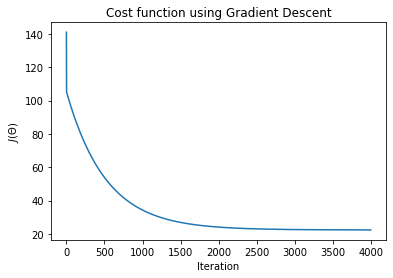

In [54]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

(-5, 40)

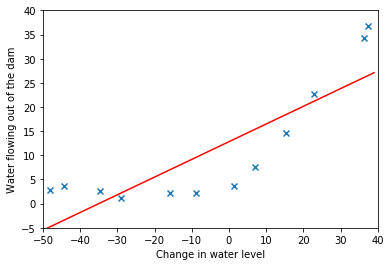

In [55]:
plt.scatter(X, y, marker = "x")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=[x for x in range(-50,40)]
y_value=[y * theta[1] + theta[0] for y in x_value]
plt.plot(x_value, y_value, color="r")
plt.xlim(-50,40)
plt.ylim(-5,40)

## Learning curves

In [84]:
def learningCurve(X, y, Xval, yval, Lambda):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    (m, n) = X.shape
    err_train, err_val = [],[]
    alpha = 0.001
    iterations = 3000
    
    for i in range(1,m+1):
        theta = gradientDescent(X[0:i,:], y[0:i,:], np.zeros((n,1)), alpha, iterations,Lambda)[0]
        err_train.append(linearRegCostFunction(X[0:i,:], y[0:i,:], theta, Lambda)[0])
        err_val.append(linearRegCostFunction(Xval, yval, theta, Lambda)[0])
        
    return err_train, err_val

Xval_1 = np.hstack((np.ones((21,1)),Xval))
error_train, error_val = learningCurve(X_1, y, Xval_1, yval, Lambda)

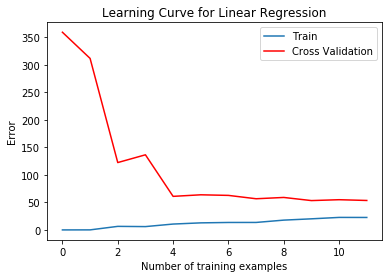

In [57]:
plt.plot(range(12), error_train, label = "Train")
plt.plot(range(12), error_val,label = "Cross Validation", color = "r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [58]:
print("# Training Examples\t Train Error \t\t Cross Validation Error")
for i in range(0,12):
    print("\t",i,"\t\t",error_train[i],"\t",error_val[i],"\n")

# Training Examples	 Train Error 		 Cross Validation Error
	 0 		 5.928953574797804e-05 	 358.925054473064 

	 1 		 0.06597924512705629 	 311.41694640703395 

	 2 		 6.441796608770214 	 122.29846405689696 

	 3 		 6.025851160905038 	 136.380165165992 

	 4 		 10.641515983557564 	 60.92671087652419 

	 5 		 12.805141087542827 	 63.76060655393217 

	 6 		 13.532998101377881 	 62.688055985395444 

	 7 		 13.574009510715024 	 56.58518412137878 

	 8 		 17.77807370655969 	 58.95562268131594 

	 9 		 20.140484386580706 	 53.260721525096805 

	 10 		 22.711604716531472 	 54.852744192964835 

	 11 		 22.620887270211814 	 53.469964104638365 



## Polynomial Regression

In [64]:
def polyFeatures(X, p):
    """
    Takes a data matrix X (size m x 1) and maps each example into its polynomial features where 
    X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    """
    for i in range(2, p + 1):
        X = np.hstack((X, (X[:,0] ** i)[:, np.newaxis]))
    
    return X

# Map X onto Polynomial features and normalize
p = 8
X_poly = polyFeatures(X, p)

In [82]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_poly_1 = sc_X.fit_transform(X_poly)
X_poly_2 = np.hstack((np.ones((len(X_poly_1), 1)), X_poly_1))

# Map Xtest onto polynomial features and normalize
X_poly_test = polyFeatures(Xtest, p)
X_poly_test_1 = sc_X.transform(X_poly_test)
X_poly_test_2 = np.hstack((np.ones((len(X_poly_test_1),1)),X_poly_test_1))

# Map Xval onto polynomial features and normalize
X_poly_val = polyFeatures(Xval, p)
X_poly_val_1 = sc_X.transform(X_poly_val)
X_poly_val_2 = np.hstack((np.ones((len(X_poly_val_1),1)),X_poly_val_1))

## Learning Polynomial Regression

In [77]:
alpha = 0.3
iterations = 20000
theta_poly, J_history_poly = gradientDescent(X_poly_2, y, np.zeros((9,1)), alpha, iterations, Lambda)

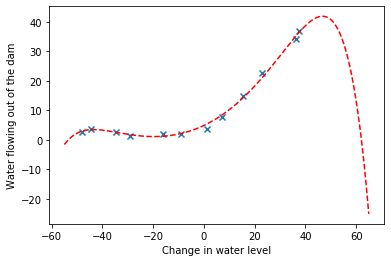

In [79]:
plt.scatter(X, y, marker="x")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value = np.linspace(-55, 65, 2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:, np.newaxis], p)
x_value_poly_1 = sc_X.transform(x_value_poly)
x_value_poly_2 = np.hstack((np.ones((len(x_value_poly_1) ,1)), x_value_poly_1))
y_value= x_value_poly_2 @ theta_poly
plt.plot(x_value,y_value,"--",color="r")

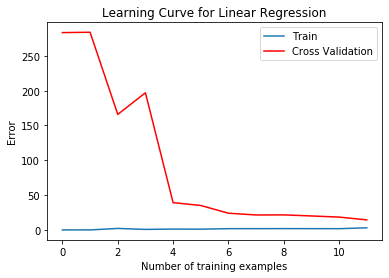

In [85]:
error_train, error_val = learningCurve(X_poly_2, y, X_poly_val_2, yval, Lambda)

plt.plot(range(12), error_train, label="Train")
plt.plot(range(12), error_val, label="Cross Validation", color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

## Polynomial regression with lambda = 100

In [88]:
Lambda = 100

alpha = 0.01
iterations = 20000
theta_poly, J_history_poly = gradientDescent(X_poly_2, y, np.zeros((9,1)), alpha, iterations, Lambda)

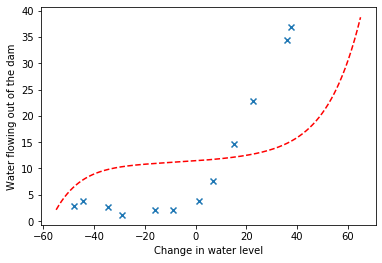

In [89]:
plt.scatter(X, y, marker="x")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value = np.linspace(-55, 65, 2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:, np.newaxis], p)
x_value_poly_1 = sc_X.transform(x_value_poly)
x_value_poly_2 = np.hstack((np.ones((len(x_value_poly_1) ,1)), x_value_poly_1))
y_value= x_value_poly_2 @ theta_poly
plt.plot(x_value,y_value,"--",color="r")

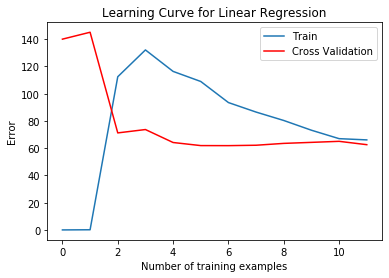

In [90]:
error_train, error_val = learningCurve(X_poly_2, y, X_poly_val_2, yval, Lambda)

plt.plot(range(12), error_train, label="Train")
plt.plot(range(12), error_val, label="Cross Validation", color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()